# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

# New Section

## A. Import libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [42]:
# Converts csv to dataframe
df = pd.read_excel('./personality.xlsx')

Display the first 5 rows of the dataset using `.head()`

In [27]:
df.head()

,Name,Posts/Share Frequently?,Active?,Replies to Comments/Msgs?,Friends/Followers,Personality
0,Emmanuel,1,1,1,552,1
1,Adrian,0,1,0,424,0
2,Justin,1,1,1,591,1
3,Mark,0,1,1,275,1
4,Karl,0,1,1,35,0


Display the summary of all the features of the dataset using `.info()`

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       100 non-null    object
 1   Posts/Share Frequently?    100 non-null    int64 
 2   Active?                    100 non-null    int64 
 3   Replies to Comments/Msgs?  100 non-null    int64 
 4   Friends/Followers          100 non-null    int64 
 5   Personality                100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [44]:
df.value_counts()

,,,,,,count
Name,Posts/Share Frequently?,Active?,Replies to Comments/Msgs?,Friends/Followers,Personality,
Adelaide,1,1,1,1400,1,1
Adrian,0,1,0,424,0,1
Aerielle,1,1,1,704,0,1
Alexa,1,1,1,762,0,1
Alyzza,1,1,1,2299,1,1
...,...,...,...,...,...,...
Thea,1,1,1,3700,1,1
Tyrese,1,1,1,1400,1,1
Vince,1,1,1,355,0,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

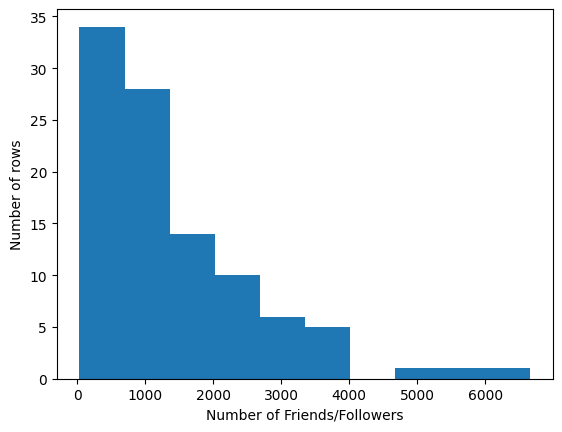

In [45]:
plt.hist(df["Friends/Followers"])
plt.xlabel("Number of Friends/Followers")
plt.ylabel("Number of rows")
plt.show()

Remove the name column using `drop()` method

In [46]:
df.drop(columns='Name', inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [47]:
X = df.drop(columns=['Personality']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [48]:
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

Display the dimensions of each variables using `.shape()`

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [50]:
knn = KNeighborsClassifier(n_neighbors=12)

Train the model using the `.fit()`

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

Test the model using the `.predict()`

In [52]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

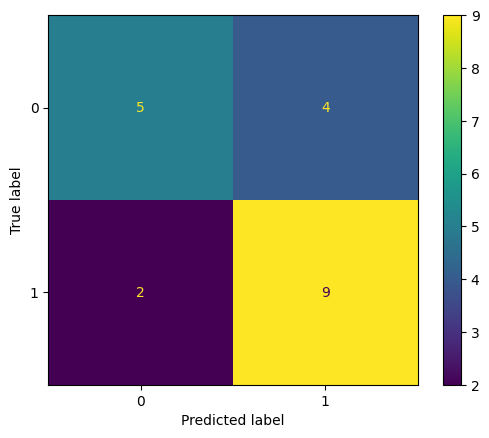

In [53]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [54]:
metrics.accuracy_score(y_test, y_pred)

0.7

Display the precision

In [55]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.55555556 0.81818182]


Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Display the f1-score

In [56]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.625 0.75 ]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [77]:
knn.predict([(0,1,1,1205)])

array([1])